## LAB Model Generation and Validation

### Data import & data types

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [279]:
# (1) get the data
data=pd.read_csv('clean_marketing_customer_analysis.csv')

#### Data checks

In [280]:
data_customer_index=data.copy()

In [281]:
index_list = data.index.tolist()
index_array = data.index.values
#print(index_list)
print(index_array)

[   0    1    2 ... 9131 9132 9133]


In [282]:
# set customer id column as index: index check
index = data.index
print(index)

RangeIndex(start=0, stop=9134, step=1)


In [283]:
# set customer id column as index: duplicates check
duplicates_count = data.duplicated(subset='customer').sum()
print(duplicates_count)

0


In [284]:
# set customer id column as index
data_customer_index.set_index("customer", inplace=True)
data_customer_index

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [285]:
# update 'data'
data=data_customer_index

In [286]:
# check
index = data_customer_index.index
print(index)

Index(['BU79786', 'QZ44356', 'AI49188', 'WW63253', 'HB64268', 'OC83172',
       'XZ87318', 'CF85061', 'DY87989', 'BQ94931',
       ...
       'CB59349', 'RX91025', 'AC13887', 'TF56202', 'YM19146', 'LA72316',
       'PK87824', 'TD14365', 'UP19263', 'Y167826'],
      dtype='object', name='customer', length=9134)


In [287]:
# recast as object: month, monthly_premium_auto, months_since_last_claim, months_since_policy_inception
data['month']=data['month'].astype('object')
data = data.astype({'months_since_last_claim': 'object', 'months_since_policy_inception': 'object'})

In [288]:
#data.info()

from previous lab, selected columns:
The final selected columns are:

['customer_lifetime_value','income', 'monthly_premium_auto']


#### Select columns

In [416]:
# (2) Select the columns that are correlated with total_claim_amount and do not suffer from multicollinearity.
selected_columns=['customer_lifetime_value','income', 'monthly_premium_auto']

In [290]:
#create dataframe with selected columns
selected_columns_df=data[['customer_lifetime_value','income', 'monthly_premium_auto','total_claim_amount']]
selected_columns_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer,,,,
BU79786,2763.519279,56274,69,384.811147
QZ44356,6979.535903,0,94,1131.464935
AI49188,12887.431650,48767,108,566.472247
WW63253,7645.861827,0,106,529.881344
HB64268,2813.692575,43836,73,138.130879
...,...,...,...,...
LA72316,23405.987980,71941,73,198.234764
PK87824,3096.511217,21604,79,379.200000
TD14365,8163.890428,0,85,790.784983


#### charts

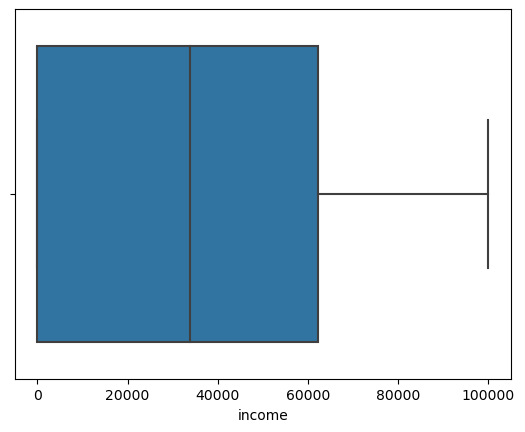

In [291]:
sns.boxplot(x=selected_columns_df['income'])
plt.show()

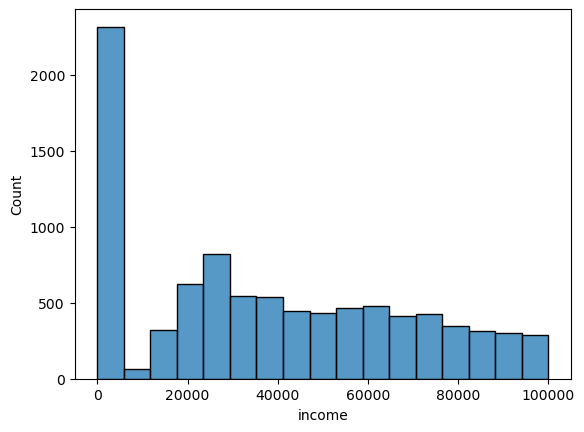

In [292]:
sns.histplot(x=selected_columns_df['income'])
plt.show()

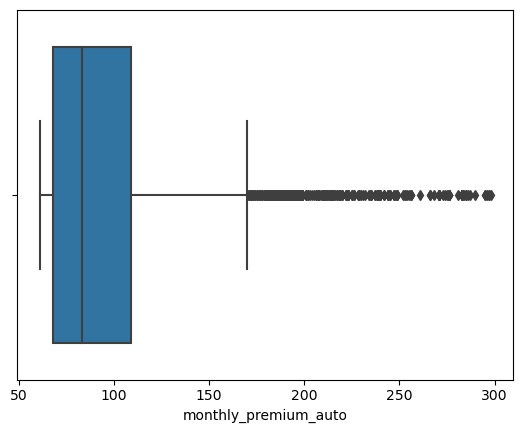

In [293]:
sns.boxplot(x=selected_columns_df['monthly_premium_auto'])
plt.show()

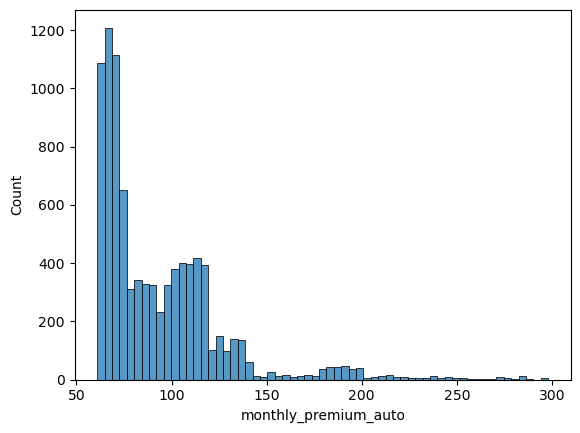

In [294]:
sns.histplot(x=selected_columns_df['monthly_premium_auto'])
plt.show()

In [295]:
selected_columns_df['monthly_premium_auto'].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: monthly_premium_auto, dtype: float64

### Outliers

In [296]:
# (3) Remove outliers from the selected columns.

# create function to remove outliers from the selected columns.

def remove_outliers(df_orig: pd.DataFrame, col: str, multiplier: float= 1.5) -> pd.DataFrame:
    df = df_orig.copy()
    iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
    upper_whisker = np.percentile(df[col], 75) + multiplier * iqr
    lower_whisker = np.percentile(df[col], 25) - multiplier * iqr
    data_removed_outliers = df[(df[col] < upper_whisker) & (df[col] > lower_whisker)]
    return data_removed_outliers


In [297]:
#assess whether to remove outliers from dependent or independent variable or both.
# just for testing, not used in model.

dependent_var_outliers = remove_outliers(selected_columns_df,'total_claim_amount', 1)
print(dependent_var_outliers.shape)
dependent_var_outliers.corr()

(8371, 4)


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.054763,0.334518,0.101659
income,0.054763,1.000000,0.070531,-0.362189
monthly_premium_auto,0.334518,0.070531,1.000000,0.362868
total_claim_amount,0.101659,-0.362189,0.362868,1.000000


In [298]:
selected_columns_df_test=data.copy()
selected_columns_df_test.shape

(9134, 24)

In [299]:
# OUTLIERS REMOVAL: income test, no records removed.
selected_columns_df_test=data.copy()
selected_columns_df_test=remove_outliers(selected_columns_df_test, 'income', 1.5)
selected_columns_df_test.shape 

(9134, 24)

In [300]:
# OUTLIERS REMOVAL: income test, some records removed.
selected_columns_df_test=remove_outliers(selected_columns_df_test, 'monthly_premium_auto', 1.5)
selected_columns_df_test.shape


(8704, 24)

In [301]:
# OUTLIERS REMOVAL: income test, no records removed.
selected_columns_df_test=remove_outliers(selected_columns_df_test, 'customer_lifetime_value', 1.5)
selected_columns_df_test.shape


(7988, 24)

In [302]:
data=selected_columns_df_test.copy()

#### Charts post outliers-removal

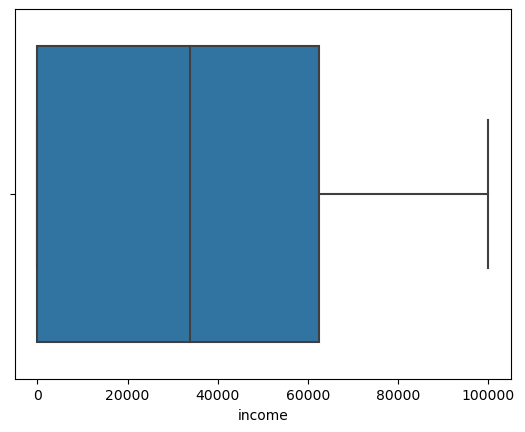

In [303]:
sns.boxplot(x=selected_columns_df_test['income'])
plt.show()

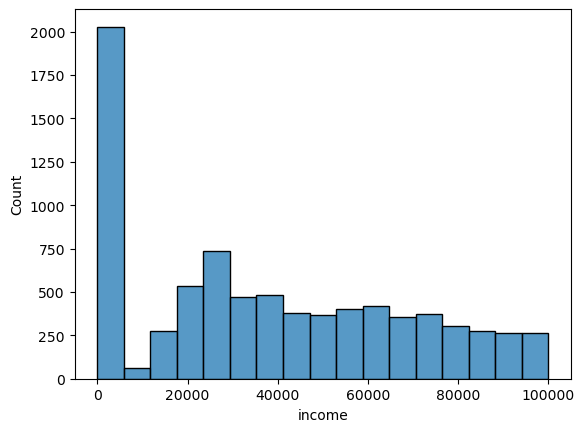

In [304]:
sns.histplot(x=selected_columns_df_test['income'])
plt.show()

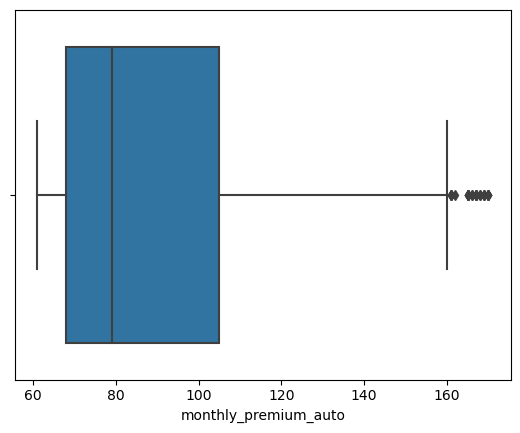

In [305]:
sns.boxplot(x=selected_columns_df_test['monthly_premium_auto'])
plt.show()

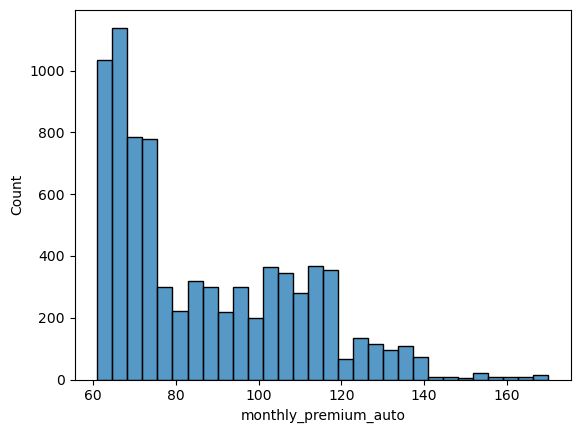

In [306]:
sns.histplot(x=selected_columns_df_test['monthly_premium_auto'])
plt.show()

#### correlation post-outliers-removal - comparison

In [307]:
selected_columns_df.shape

(9134, 4)

In [308]:
selected_columns_df_test.shape

(7988, 24)

#### correlation charts

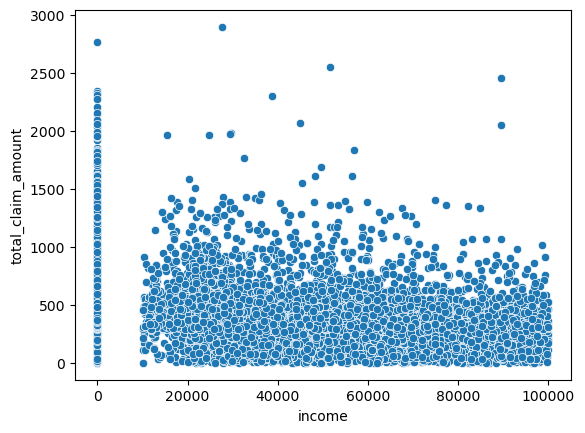

In [309]:
sns.scatterplot(data=selected_columns_df, x='income',y='total_claim_amount')
plt.show()

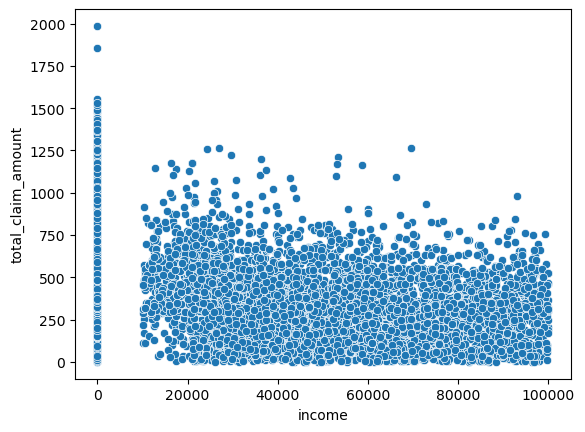

In [310]:
sns.scatterplot(data=selected_columns_df_test, x='income',y='total_claim_amount')
plt.show()

### X y split


In [311]:
# (4) Perform an X-y split: separate data from dependent and independent variables
# creating dataframe for X keeping all other columns that were not selected for X as well
#begin from data again
selected_data=data.copy()
y = selected_data['total_claim_amount']
X = selected_data.drop(['total_claim_amount'], axis=1)

### train / test split

In [313]:
# (5) separate train and test data, for both X and y.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [314]:
# (6) Create new Pandas DataFrames from the X_train and X_test Numpy arrays:

X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

### add addditional split here

In [424]:
selected_columns=['customer_lifetime_value','income', 'monthly_premium_auto']
keep_columns=['number_of_open_complaints', 'number_of_policies']

In [425]:
# (7) Split the X_train Pandas DataFrame into two parts: numerical and categorical

#numerical TRAIN:
X_train_num_df_all = X_train_df.select_dtypes(include = np.number)
X_train_num_df = X_train_num_df_all[selected_columns]  #selected columns
X_train_num_df_keep = X_train_num_df_all[keep_columns] #columns to keep

#numerical TEST:
X_test_num_df_all = X_test_df.select_dtypes(include = np.number)
X_test_num_df = X_test_df[selected_columns]  #selected columns
X_test_num_df_keep = X_test_df[keep_columns] #columns to keep

#categorical:
X_train_cat_df=X_train_df.select_dtypes(include=["object"])
X_test_cat_df=X_test_df.select_dtypes(include=["object"])

### Transformation: numerical

In [317]:
# Status: Done! Output:
# X_train_num_transformed_df 
# X_test_num_transformed_df

In [426]:
data.describe() #apply logarithmic scaling to clv and mtpremium, not income (as it has zero in values)

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,number_of_policies,total_claim_amount
count,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000,7988.000000
mean,6069.716768,37718.572233,86.894717,0.392088,3.052328,400.173487
std,3043.972422,30479.345318,22.558985,0.926900,2.472489,233.305297
min,1898.007675,0.000000,61.000000,0.000000,1.000000,0.099007
25%,3652.322444,0.000000,68.000000,0.000000,1.000000,261.930545
50%,5348.186793,33880.000000,79.000000,0.000000,2.000000,364.800000
75%,8009.846870,62412.000000,105.000000,0.000000,4.000000,527.209700
max,15814.745570,99981.000000,170.000000,5.000000,9.000000,1985.999807


In [427]:
# (8) Train transformers and/or scalers for the numerical columns:
# Use the .fit() method on the train set to train the transformer/scaler on the numerical columns.

from sklearn.preprocessing import PowerTransformer

# Transforming data
p_transformer = PowerTransformer(standardize=True)
p_transformer.fit(X_train_num_df) # we will reuse this transformer for X_test later
# keep original data and transf in new DF.

PowerTransformer()

In [428]:
# (9) Save transformers/scalers using pickle:

import pickle

path = "./"
filename = "power_transformer_lab.pkl"

with open(path+filename, "wb") as file:
    pickle.dump(p_transformer, file)

In [429]:
# (10) Transform the numerical columns in both the train and test sets:
#Use the .transform() method on the train and test sets to apply the transformers/scalers.

# transform, creates np.array
X_train_num_transformed = p_transformer.transform(X_train_num_df)
X_test_num_transformed  = p_transformer.transform(X_test_num_df)

# convert from np.array to pd.DataFrame
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num_df.columns)
X_test_num_transformed_df  = pd.DataFrame(X_test_num_transformed,  columns=X_test_num_df.columns)
X_train_num_transformed_df.head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.521885,-0.001956,-1.515457
1,-0.664744,0.846986,0.671122
2,-0.400247,0.499599,1.088427
3,0.885745,-1.616295,-0.954222
4,1.005424,-1.616295,0.101699


#### Charts: post transformation

In [430]:
print(p_transformer.lambdas_)


[-0.01155798  0.26621737 -1.30407605]


/Users/alexferrer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


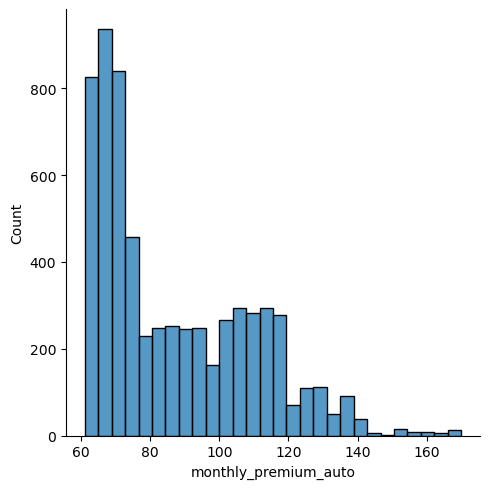

In [469]:
#print(pt.transform(data))
sns.displot(X_train_num_df['monthly_premium_auto'])
plt.show()

/Users/alexferrer/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


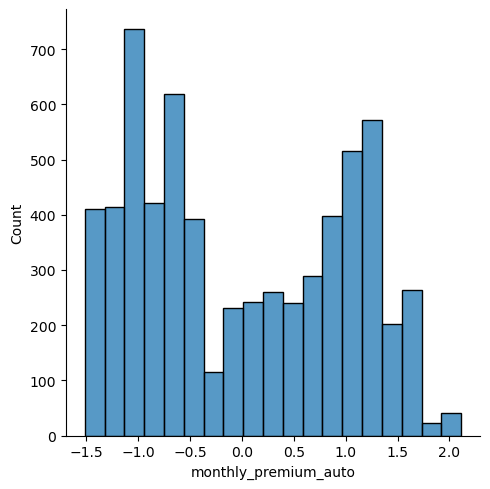

In [325]:
#print(pt.transform(data))
sns.displot(X_train_num_transformed_df['monthly_premium_auto'])
plt.show()

### Transformation: categorical

In [431]:
# define and split categorical variables into ordinal and nominal: 

# ordinal: 
# 'response', 'coverage', 'education', 'employmentstatus', 'sales_channel', 'vehicle_class', 'vehicle_size'

# nominal
# 'customer', 'state', 'effective_to_date', 'gender', 'location_code', 'marital_status', 'months_since_last_claim', 'months_since_policy_inception', 'policy_type', 'policy', 'renew_offer_type'

# ordinal and nomina columns list
selected_columns_ordinal = ['response', 'coverage', 'education', 'employmentstatus', 'sales_channel', 'vehicle_class', 'vehicle_size']
selected_columns_nominal = ['state', 'effective_to_date', 'gender', 'location_code', 'marital_status', 'months_since_last_claim', 'months_since_policy_inception', 'policy_type', 'policy', 'renew_offer_type']
#selected_columns_nominal_customer=['customer']

In [432]:
# split X_train_cat into ordinal and nominal
X_train_cat_ordinal_df = X_train_cat_df[selected_columns_ordinal]

X_train_cat_nominal_df = X_train_cat_df[selected_columns_nominal]

# split X_test_cat into ordinal and nominal
X_test_cat_ordinal_df = X_test_cat_df[selected_columns_ordinal]

X_test_cat_nominal_df = X_test_cat_df[selected_columns_nominal]


In [433]:
X_train_cat_nominal_df.shape

(6390, 10)

#### Categorical: Nominal. Transform with OneHotEncoder

In [434]:
# (11) Transform the categorical nominal columns into numbers using OneHotEncoder:
# Apply the OneHotEncoder on both the train and test sets using the .transform() method.
#STATUS DONE! Output:
# X_train_cat_nominal_df_encoded
# X_test_cat_nominal_df_encoded
#customer?

In [435]:
# Train the OneHotEncoder only on the train set using the .fit() method.
from sklearn.preprocessing import OneHotEncoder
import pickle

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  
encoder.fit(X_train_cat_nominal_df)

OneHotEncoder(drop='first', handle_unknown='ignore')

In [436]:
# save encoder for future use

path = "./"
filename = "one_hot_encoder_lab.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

In [437]:
# # Apply the OneHotEncoder on both the train and test sets using the .transform() method.

X_train_cat_nominal_npa_encoded = encoder.transform(X_train_cat_nominal_df).toarray() #apply to train
X_test_cat_nominal_npa_encoded = encoder.transform(X_test_cat_nominal_df).toarray() #apply to test

In [438]:
# convert np.arrays to pd.DataFrame
X_train_cat_nominal_df_encoded = pd.DataFrame(X_train_cat_nominal_npa_encoded, columns=encoder.get_feature_names_out())
X_test_cat_nominal_df_encoded = pd.DataFrame(X_test_cat_nominal_npa_encoded, columns=encoder.get_feature_names_out())

#### Categorical: Ordinal. Map to numerical values

In [334]:
# (12) Replace categorical ordinal columns with numerical values:
# Use .replace() to map the labels to numerical values while respecting the order and 
# relative "distance" between labels.
# Status: Done! Output:
# X_train_cat_ordinal_df_encoded
# X_test_cat_ordinal_df_encoded

In [335]:
X_train_cat_ordinal_df.describe()

,response,coverage,education,employmentstatus,sales_channel,vehicle_class,vehicle_size
count,6390,6390,6390,6390,6390,6390,6390
unique,2,3,5,5,4,4,3
top,No,Basic,Bachelor,Employed,Agent,Four-Door Car,Medsize
freq,5454,3982,1930,3930,2468,3456,4486


In [439]:
# display unique values from each column:
for column in X_train_cat_ordinal_df.columns:
    unique_values = X_train_cat_ordinal_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in response: ['No' 'Yes']
Unique values in coverage: ['Basic' 'Extended' 'Premium']
Unique values in education: ['High School or Below' 'Bachelor' 'Doctor' 'College' 'Master']
Unique values in employmentstatus: ['Disabled' 'Employed' 'Unemployed' 'Medical Leave' 'Retired']
Unique values in sales_channel: ['Call Center' 'Branch' 'Agent' 'Web']
Unique values in vehicle_class: ['Two-Door Car' 'Four-Door Car' 'Luxury' 'SUV']
Unique values in vehicle_size: ['Medsize' 'Large' 'Small']


In [440]:
#obtain column list for function
col_list = X_train_cat_ordinal_df.columns.tolist()
col_list

['response',
 'coverage',
 'education',
 'employmentstatus',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [441]:
#design mapping for function
mappings = {
    'response': {
        'No': 0,
        'Yes': 1
    },
    'coverage': {
        'Extended': 1,
        'Basic': 0,
        'Premium': 2
    },
    'education': {
        'High School or Below': 0,
        'College': 1,
        'Bachelor': 2,
        'Master': 3,
        'Doctor': 4
    },
    'employmentstatus': {
        'Employed': 1,
        'Unemployed': 0,
        'Disabled': 0,
        'Retired': 0,
        'Medical Leave': 0
    },
    'sales_channel': {
        'Call Center': 0,
        'Web': 1,
        'Branch': 2,
        'Agent': 3
    },
    'vehicle_class': {
        'Four-Door Car': 0,
        'Two-Door Car': 1,
        'SUV': 2,
        'Luxury': 3
    },
    'vehicle_size': {
        'Small': 0,
        'Medsize': 1,
        'Large': 2
    }
}

In [442]:
from typing import List, Dict

In [443]:
# create function to aid with the transformation
def ordinal_tranformation_to_new_df(df: pd.DataFrame, col_list: List[str], mappings: Dict[str, Dict[str, int]]) -> pd.DataFrame:
    '''
    this function will create the transformed/encoded columns for ordinal variables
    df: DataFrame
    col_list: list of columns to encode
    mappings: dictionary of dictionaries containing the mappings for each column
    '''
    encoded_df = pd.DataFrame()
    for col in col_list:
        df2 = df.copy()
        new_col_name = f"{col}_cat_ord_encoded"
        encoded_df[new_col_name] = df2[col].map(mappings[col])
    return encoded_df



In [444]:
#call function
X_train_cat_ordinal_df_encoded = ordinal_tranformation_to_new_df(X_train_cat_ordinal_df, col_list, mappings)
X_test_cat_ordinal_df_encoded = ordinal_tranformation_to_new_df(X_test_cat_ordinal_df, col_list, mappings)

X_train_cat_ordinal_df_encoded.head()

,response_cat_ord_encoded,coverage_cat_ord_encoded,education_cat_ord_encoded,employmentstatus_cat_ord_encoded,sales_channel_cat_ord_encoded,vehicle_class_cat_ord_encoded,vehicle_size_cat_ord_encoded
customer,,,,,,,
NP88319,0,0,0,0,0,1,1
QN62502,0,1,2,1,2,0,1
OA23108,0,0,4,1,2,3,1
UC69263,0,0,2,0,3,1,1
UG38549,0,1,0,0,3,0,2


In [445]:
# display unique values from each column:
for column in X_train_cat_ordinal_df_encoded.columns:
    unique_values = X_train_cat_ordinal_df_encoded[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in response_cat_ord_encoded: [0 1]
Unique values in coverage_cat_ord_encoded: [0 1 2]
Unique values in education_cat_ord_encoded: [0 2 4 1 3]
Unique values in employmentstatus_cat_ord_encoded: [0 1]
Unique values in sales_channel_cat_ord_encoded: [0 2 3 1]
Unique values in vehicle_class_cat_ord_encoded: [1 0 3 2]
Unique values in vehicle_size_cat_ord_encoded: [1 2 0]


### Post Transformation: more transformation

#### Concatenate DataFrame(s)

In [343]:
#list of dataframes to be concatenated:

# X_train_num_transformed_df --no index
# X_test_num_transformed_df

# X_train_cat_nominal_df_encoded -- no index
# X_test_cat_nominal_df_encoded

# X_train_cat_ordinal_df_encoded -- with customer index
# X_test_cat_ordinal_df_encoded

In [446]:
# (13) Concatenate the transformed numerical and categorical DataFrames:
#drop index as the data has index inconsistencies (some used customer some regular index)

X_train_num_df.reset_index(inplace=True)
X_test_num_df.reset_index(inplace=True)

X_train_num_transformed_df.reset_index(drop=True, inplace=True)
X_test_num_transformed_df.reset_index(drop=True, inplace=True)

X_train_cat_nominal_df_encoded.reset_index(drop=True, inplace=True)
X_test_cat_nominal_df_encoded.reset_index(drop=True, inplace=True)

X_train_cat_ordinal_df_encoded.reset_index(drop=True, inplace=True)
X_test_cat_ordinal_df_encoded.reset_index(drop=True, inplace=True)

In [447]:
# (13) Concatenate the transformed numerical and categorical DataFrames:
#num, cat ord, cat nom, client
#X_train_num_df
#X_test_num_df

# concat
X_train_concat_df = pd.concat([X_train_num_df['customer'],X_train_num_transformed_df, X_train_cat_nominal_df_encoded, X_train_cat_ordinal_df_encoded], axis=1)
X_test_concat_df = pd.concat([X_test_num_df['customer'],X_test_num_transformed_df, X_test_cat_nominal_df_encoded, X_test_cat_ordinal_df_encoded], axis=1)

In [448]:
X_train_concat_df.set_index("customer", inplace=True)
X_test_concat_df.set_index("customer", inplace=True)

In [449]:
print(X_train_concat_df.shape) #7307
print(X_test_concat_df.shape) #1827

(6390, 224)
(1598, 224)


#### MinMaxScaler

In [349]:
# 14. Apply MinMaxScaler to the concatenated DataFrame:
#- Train the MinMaxScaler on the concatenated DataFrame using the `.fit()` method.
#   - Transform the concatenated DataFrame using the `.transform()` method.

In [450]:
#create scalers' directory

import os

path = "scalers/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

In [451]:
from sklearn.preprocessing import MinMaxScaler # Sets for each colum the minimum = 0 and the maximum = 1

# initiate scaler
scaler = MinMaxScaler()

# fit method to train scaler:  Determine the min and the max of each column in the TRAIN set
scaler.fit(X_train_concat_df)

MinMaxScaler()

In [452]:
# 15. Save MinMaxScaler using pickle:
#   - Create a new directory (if it doesn't exist) to store the MinMaxScaler.
#   - Use the `pickle.dump()` function to save the MinMaxScaler to a .pkl file.

# save scaler for later use
path = "./scalers/"
scaler_file_name = "min_max_scaler_lab.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

In [453]:
# transform (scale) dataframes
X_train_scaled = scaler.transform(X_train_concat_df) # .transform() applies the transformation x_normalized will be np.array
X_test_scaled  = scaler.transform(X_test_concat_df) # .transform() applies the transformation x_normalized will be np.array

# We create new Pandas DataFrames out of the Numpy arrays.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_concat_df.columns)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=X_train_concat_df.columns)

print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)

(6390, 224)
(1598, 224)


### Linear Regression (finally)

#### fit model --- post

In [454]:
# 16. Apply linear regression to the transformed DataFrame:
#   - Use the linear regression model from sklearn.
#   - Train the model on the transformed DataFrame using the `.fit()` method.

#import linear regression from sklearn
from sklearn.linear_model import LinearRegression

In [455]:
# create blank regression model and train it using the fit model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [458]:
#17. Save the linear regression model using pickle:
#   - Create a new directory (if it doesn't exist) to store the linear regression model.
#   - Use the `pickle.dump()` function to save the linear regression model to a .pkl file.

path = "./"
model_file_name = "linear_model_lab.pkl"

with open(path + model_file_name, "wb") as file:
    pickle.dump(linear_model, file)
    

In [ ]:
print(linear_model.intercept_) # 
print(linear_model.coef_) # 


In [ ]:
#18. Perform model validation:
#   - Compute the following metrics for the train and test sets: R2, MSE, RMSE, MAE.

In [460]:
#use model to predict y_train and y_test
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred  = linear_model.predict(X_test_scaled_df)

In [461]:
y_test_pred.shape

(1598,)

In [462]:
#create results dataframe
results = {"Set": ["Train"]*X_train_scaled_df.shape[0] + ["Test"]*X_test_scaled_df.shape[0], 
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,314.528138,327.683103
1,Train,157.440069,131.777011
2,Train,319.294289,415.064808
3,Train,445.265108,504.840111
4,Train,597.600000,588.205990


In [463]:
results_df.shape

(7988, 3)

In [464]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,314.528138,327.683103,-13.154965
1,Train,157.440069,131.777011,25.663058
2,Train,319.294289,415.064808,-95.770519
3,Train,445.265108,504.840111,-59.575003
4,Train,597.600000,588.205990,9.394010


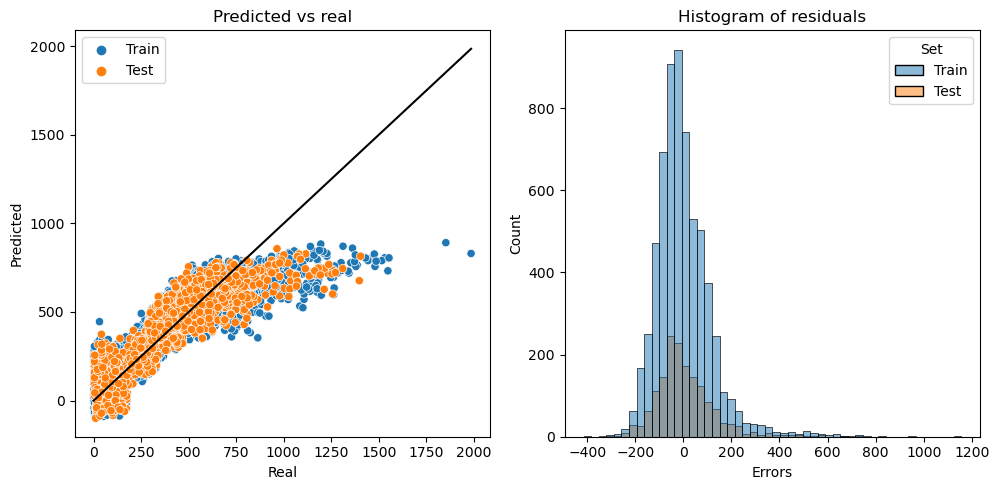

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(results_df, x="Real", y="Predicted", hue="Set", ax=ax[0])
sns.lineplot(results_df, x="Real", y="Real", color="black", ax=ax[0])
ax[0].set_title("Predicted vs real")
sns.histplot(results_df, x="Errors", bins=50, hue="Set", ax=ax[1])
ax[1].set_title("Histogram of residuals")

plt.tight_layout()
plt.show()

### Model Validation

- Compute the following metrics for your Train and Test sets:
  - [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).
  - [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error).
  - [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn-metrics-mean-squared-error)
  - [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn-metrics-mean-absolute-error).

- Create a Pandas DataFrame to summarize the error metrics for the Train and Test sets.

In [368]:
#19. Create a Pandas DataFrame to summarize the error metrics for the train and test sets.

In [466]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    Function: Calculate the various error metrics for a given set of train and test data prediction splits and organises them into a dataframe for easier visualisation
    Inputs: y_real training data, y_real test data, y_prediction training data, y_prediction test data
    Outputs: Dataframe with metrics column, and errors split by test and training data type. 
    '''
    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test, squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric": ['MAE', 'MSE', 'RMSE', 'R2'], 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [467]:
error_metrics_report_df = error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

In [468]:
error_metrics_report_df

,Metric,Train,Test
0,MAE,84.27,86.89
1,MSE,13909.66,14195.54
2,RMSE,117.94,119.15
3,R2,0.74,0.75
